In [14]:
# 실전 예제로 주식 데이터(삼성전자, 카카오, 네이버) 를 활용하여
# 주가 변동을 시각화하는 예제를 만들어보겠습니다.
#
# 이 예제에서는 Matplotlib과 Pandas를 활용하여 다음을 분석합니다:
#
# 주가 변동 라인 그래프
# 삼성전자, 카카오, 네이버의 주가 변동을 하나의 그래프로 시각화합니다.
#
# 이동 평균선 추가
# 단기(5일) 및 장기(20일) 이동 평균선을 추가하여 주가 추세를 분석합니다.
#
# 히트맵을 통한 상관관계 분석
# 삼성전자, 카카오, 네이버의 주가 상관관계를 히트맵으로 표현합니다.
#
#
# 1. 주식 데이터 수집 및 처리
# 먼저, 삼성전자(005930), 카카오(035720), 네이버(035420)의 주가 데이터를 가져오겠습니다.
# 실시간 주식 데이터를 사용하기 위해, web을 이용하여 최신 데이터를 검색합니다.
#
# 실전 예제로 삼성전자, 네이버, 카카오의 주가 데이터를 활용하여 주가 변동을 시각화하는 방법을 안내하겠습니다. 이를 통해 주가 변동 추이와 종목 간 상관관계를 분석할 수 있습니다.
#
#
#
# 1. 주가 데이터 수집
# 주가 데이터를 수집하기 위해 yahoo_fin 라이브러리를 사용합니다. 이 라이브러리는 야후 파이낸스에서 주가 데이터를 가져올 수 있도록 도와줍니다.
#
# 필요한 라이브러리 설치:

In [18]:
# !pip install yahoo_fin pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yahoo_fin import stock_info as si

# 종목 코드 설정
tickers = {
    '삼성전자': '005930.KS',
    '네이버': '035420.KS',
    '카카오': '035720.KS'
}

# 데이터 수집
data = {}
for company, ticker in tickers.items():
    data[company] = si.get_data(ticker, start_date='2022-01-01', end_date='2025-01-01')


In [ ]:
# 2. 데이터 전처리
# 수집한 데이터에서 종가(close) 정보를 추출하고, 이를 하나의 데이터프레임으로 결합합니다.

In [3]:
# 종가 데이터 추출 및 결합
close_prices = pd.DataFrame()

for company, df in data.items():
    close_prices[company] = df['close']

# 날짜 인덱스 설정
close_prices.index = data['삼성전자'].index

In [ ]:
# 3. 주가 변동 시각화
# 각 기업의 주가 변동을 라인 그래프로 시각화합니다.

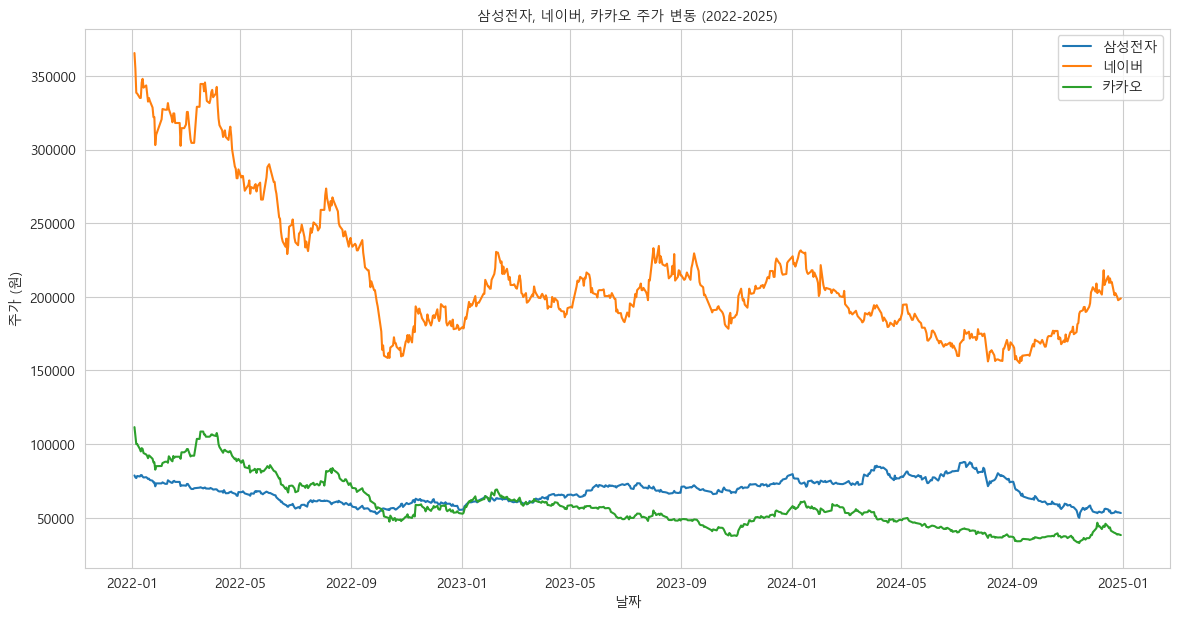

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 경로 설정 (Windows)
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로

font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(14, 7))
for company in close_prices.columns:
    plt.plot(close_prices.index, close_prices[company], label=company)

plt.title('삼성전자, 네이버, 카카오 주가 변동 (2022-2025)', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('주가 (원)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

In [ ]:

# 4. 이동 평균선 추가
# 주가의 단기 및 장기 추세를 파악하기 위해 20일 및 60일 이동 평균선을 계산하고 시각화합니다.



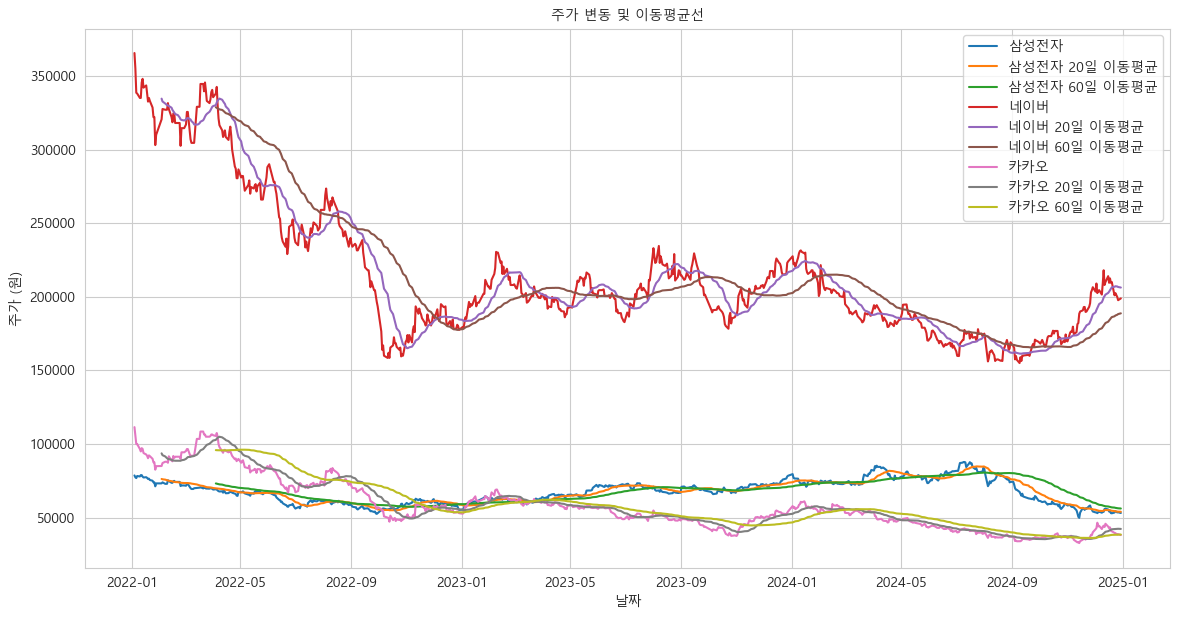

In [5]:
# 이동 평균선 계산
ma_days = [20, 60]
for ma in ma_days:
    for company in close_prices.columns:
        column_name = f'{company} {ma}일 이동평균'
        close_prices[column_name] = close_prices[company].rolling(window=ma).mean()

# 시각화
plt.figure(figsize=(14, 7))
for company in close_prices.columns[:3]:
    plt.plot(close_prices.index, close_prices[company], label=company)
    for ma in ma_days:
        plt.plot(close_prices.index, close_prices[f'{company} {ma}일 이동평균'],
                 label=f'{company} {ma}일 이동평균')

plt.title('주가 변동 및 이동평균선', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('주가 (원)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

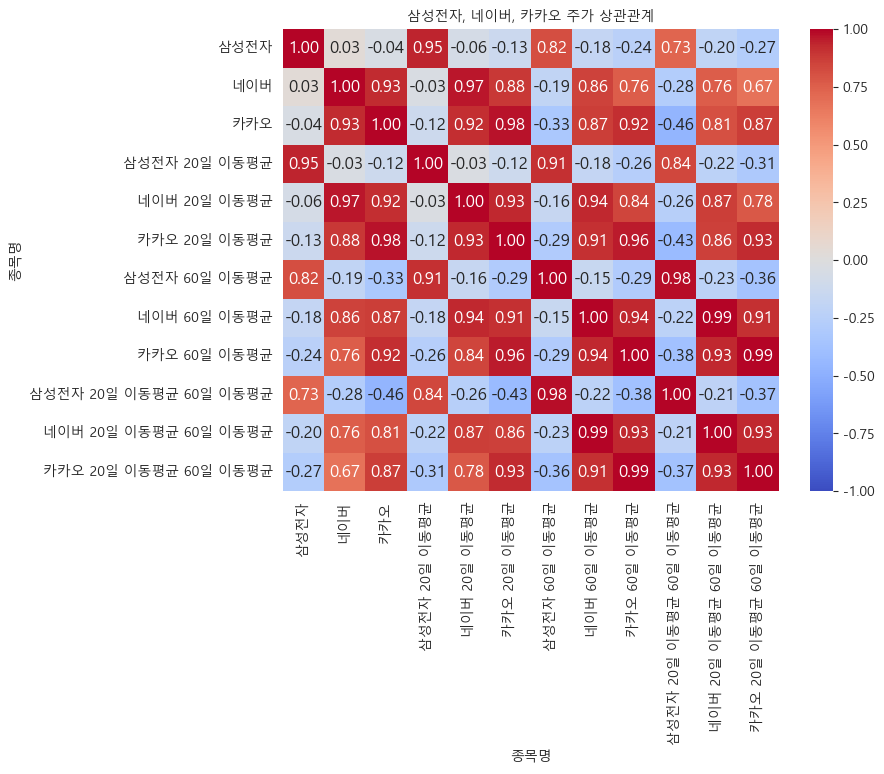

In [6]:
# 📌 종가 데이터의 상관계수 계산
corr = close_prices.corr()

# 📌 히트맵 시각화 (한글 폰트 적용)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"fontsize": 12, "fontproperties": font_prop}, fmt=".2f")

# 📌 그래프 제목 및 축 레이블 한글 적용
plt.title("삼성전자, 네이버, 카카오 주가 상관관계", fontproperties=font_prop)
plt.xlabel("종목명", fontproperties=font_prop)
plt.ylabel("종목명", fontproperties=font_prop)

plt.show()